In [129]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import warnings

## neural network library
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Input
from mlxtend.plotting import plot_confusion_matrix
import pickle
import joblib


In [130]:


# Suppress all DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [131]:
## load data
df = pd.read_csv("diabetes.csv")
df.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [132]:
## info for missing value and data type
df.info()

## all variables contain no null value but complete
## all variable values are numeric 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [133]:
## Basic statistics summary of all variables in dataset
df.describe()

## Age group covering from 40 to 95, missing youth
## mean Sex > 0.5, 14.88% more male interviewees

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [134]:
# Columns that can't logically be zero
cols_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0 with np.nan
for col in cols_to_clean:
    df[col] = df[col].replace(0, np.nan)

# Check how many missing values we introduced
print(df.isna().sum())



Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [135]:

# Fill missing values with the median of each column
for col in cols_to_clean:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)


# Confirm no more missing values
print(df.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [136]:
## defining independent and dependent variables
X=df.drop(["Outcome"],axis=1)
y=df["Outcome"]


In [137]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [138]:

model = Sequential()

# Use Input layer explicitly
model.add(Input(shape=(X_train_scaled.shape[1],)))  # input shape = number of features
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

In [139]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)


Epoch 1/100


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4821 - loss: 0.7292 - val_accuracy: 0.5909 - val_loss: 0.6827
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6140 - loss: 0.6644 - val_accuracy: 0.6364 - val_loss: 0.6380
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6743 - loss: 0.6294 - val_accuracy: 0.6429 - val_loss: 0.6074
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6985 - loss: 0.5944 - val_accuracy: 0.6688 - val_loss: 0.5845
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7365 - loss: 0.5503 - val_accuracy: 0.6688 - val_loss: 0.5655
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6889 - loss: 0.5539 - val_accuracy: 0.6818 - val_loss: 0.5515
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6553 - loss: 0.5728 - val_accuracy: 0.6948 - val_loss: 0.5388
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7530 - loss: 0.5070 - val_accuracy: 0.6948 - val_loss: 0.

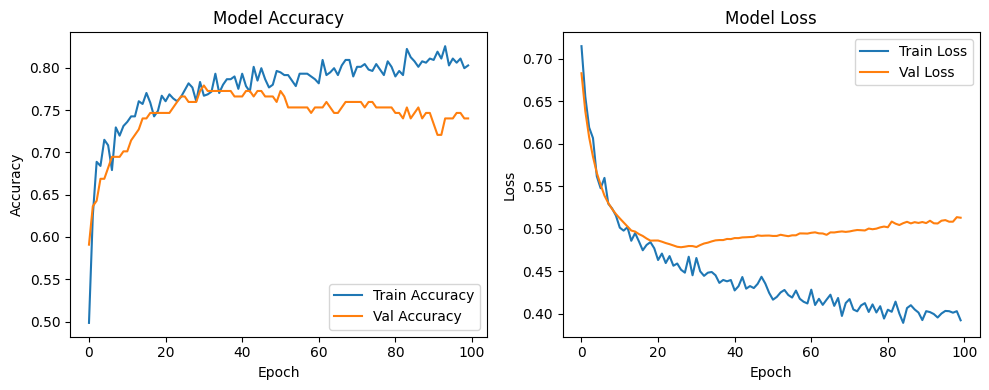

In [140]:
# Plot training & validation accuracy
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Accuracy: 0.7337662337662337

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.96      0.82        99
           1       0.82      0.33      0.47        55

    accuracy                           0.73       154
   macro avg       0.77      0.64      0.65       154
weighted avg       0.75      0.73      0.70       154



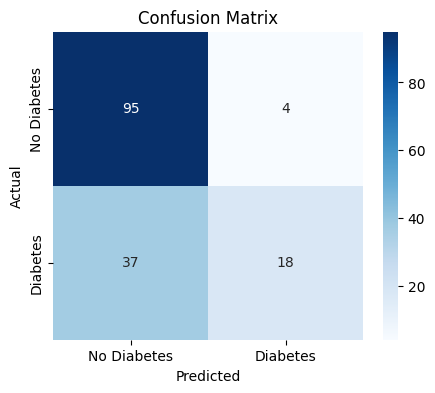

In [149]:
# Predict probabilities on test set
y_pred_proba = model.predict(X_test_scaled)

# Convert probabilities to binary predictions (threshold = 0.5)
y_pred = (y_pred_proba > 0.75).astype("int32")

# Accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [142]:
# Re-use scaled data
svm_linear = svm.SVC(kernel='linear')
svm_rbf = svm.SVC(kernel='rbf')
svm_sigmoid = svm.SVC(kernel='sigmoid')

# Train on scaled data
svm_linear.fit(X_train_scaled, y_train)
svm_rbf.fit(X_train_scaled, y_train)
svm_sigmoid.fit(X_train_scaled, y_train)

# Predict
y_pred_linear = svm_linear.predict(X_test_scaled)
y_pred_rbf = svm_rbf.predict(X_test_scaled)
y_pred_sigmoid = svm_sigmoid.predict(X_test_scaled)

# Evaluate
print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))
print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Sigmoid Kernel Accuracy:", accuracy_score(y_test, y_pred_sigmoid))

Linear Kernel Accuracy: 0.7532467532467533
RBF Kernel Accuracy: 0.7467532467532467
Sigmoid Kernel Accuracy: 0.6948051948051948


In [148]:
print(classification_report(y_test, y_pred_linear))


              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [144]:
y_pred_linear = svm_linear.predict(X_test_scaled)

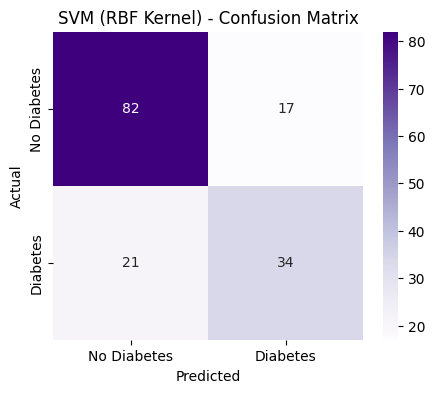

In [145]:

# Compute confusion matrix
cm_linear = confusion_matrix(y_test, y_pred_linear)

# Plot
plt.figure(figsize=(5, 4))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['No Diabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Diabetes'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM (RBF Kernel) - Confusion Matrix')
plt.show()

In [146]:
# Instantiate the model
logreg = LogisticRegression()

# Fit to the training data (use scaled features!)
logreg.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_logreg = logreg.predict(X_test_scaled)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.7532467532467533

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



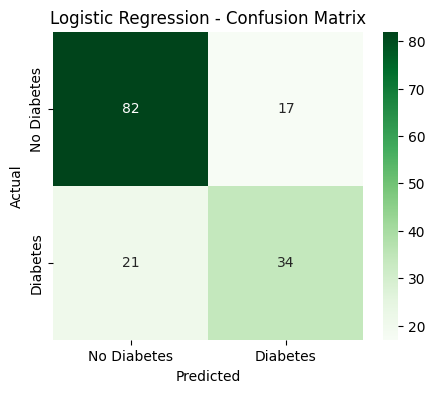

In [147]:

cm_logreg = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])

plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [151]:
# Save the trained SVM Linear model to a .pkl file
with open('svm_linear.pkl', 'wb') as f:
    pickle.dump(svm_linear, f)

print("✅ SVM Linear model has been saved as 'svm_linear_model.pkl'")

✅ SVM Linear model has been saved as 'svm_linear_model.pkl'


In [152]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
